# Life Expectency ML model by:

### Ahmed AlِِِِِِِِِِAsmar 0189548 
### Abdullah AbuShakhdam 0188529

Although there have been lot of studies undertaken in the past on factors affecting life expectancy considering demographic variables, income composition and mortality rates. It was found that affect of immunization and human development index was not taken into account in the past. Also, some of the past research was done considering multiple linear regression based on data set of one year for all the countries. Hence, this gives motivation to resolve both the factors stated previously by formulating a regression model based on mixed effects model and multiple linear regression while considering data from a period of 2000 to 2015 for all the countries. Important immunization like Hepatitis B, Polio and Diphtheria will also be considered. In a nutshell, this study will focus on immunization factors, mortality factors, economic factors, social factors and other health related factors as well. Since the observations this dataset are based on different countries, it will be easier for a country to determine the predicting factor which is contributing to lower value of life expectancy. This will help in suggesting a country which area should be given importance in order to efficiently improve the life expectancy of its population.

In [71]:
# importing part:

import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from tensorflow import keras


f = r"C:\Users\ahmed\Downloads\Life Expectancy Data.csv" # read the csv file
data = pd.read_csv(f) # data is a dataframe 


# The following code shows the histogram plot so we can get information from the dataset.

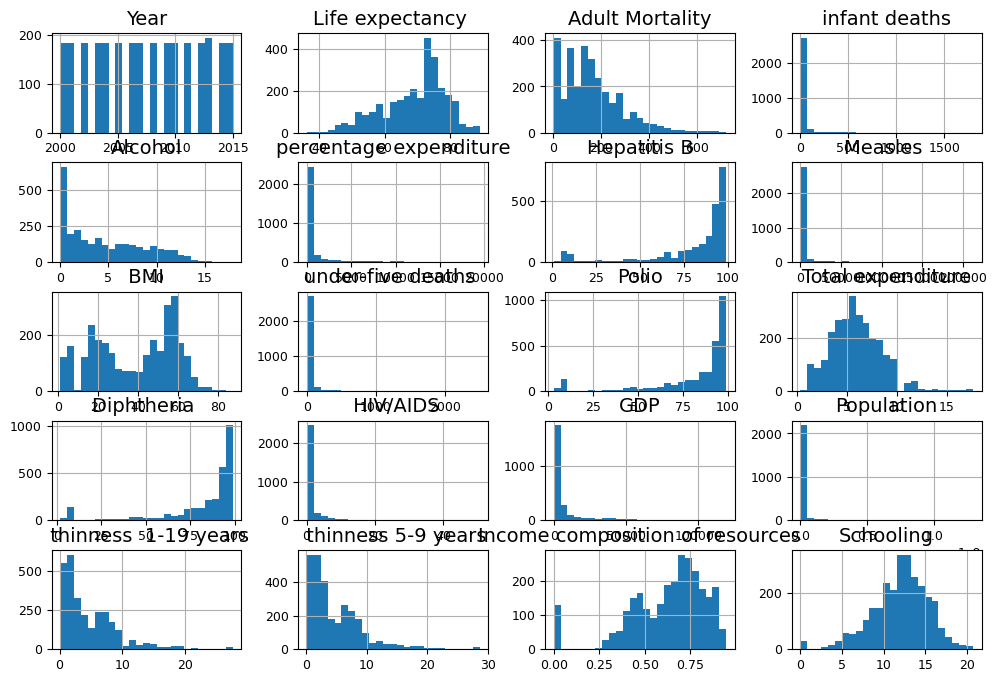

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

f = r"C:\Users\ahmed\Downloads\Life Expectancy Data.csv" # read the csv file
data = pd.read_csv(f) # data is a dataframe 

plt.rc('font', size=12)
plt.rc('axes', labelsize=12, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=9)
plt.rc('ytick', labelsize=9)

data.hist(bins=25, figsize=(12, 8))
plt.savefig("Life Expectancy Data_histPlot")  # Saving the figure to a file
plt.show()


#  to take a look into the dataset: 

In [73]:
print(data.head())
print(data.describe()) # to check if the dataset needs to be scaled

       Country  Year      Status  Life expectancy   Adult Mortality   
0  Afghanistan  2015  Developing              65.0            263.0  \
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...   
0             62     0.01               71.279624         65.0      1154  ...  \
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population   
0    6.

# Check the count of the unique elements:

In [74]:
print(data["Country"].value_counts())  #Length is 193 which means 
print(data["Year"].value_counts())
print(data["Status"].value_counts()) 

#in status we only have 2 catagories,either devoloping or developed,
#and that means nothing as a feature that would not affect the predicted value.

Country
Afghanistan              16
Peru                     16
Nicaragua                16
Niger                    16
Nigeria                  16
                         ..
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: count, Length: 193, dtype: int64
Year
2013    193
2015    183
2014    183
2012    183
2011    183
2010    183
2009    183
2008    183
2007    183
2006    183
2005    183
2004    183
2003    183
2002    183
2001    183
2000    183
Name: count, dtype: int64
Status
Developing    2426
Developed      512
Name: count, dtype: int64


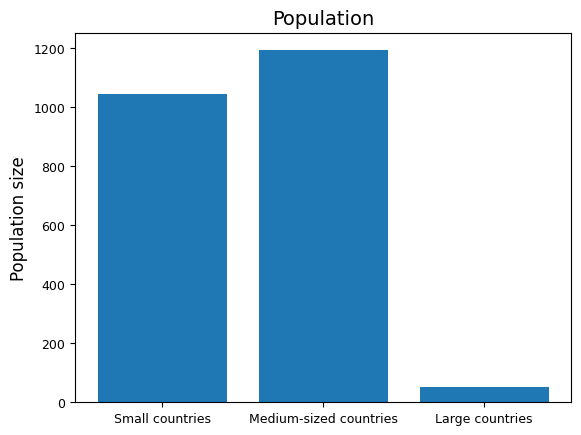

In [75]:
import matplotlib.pyplot as plt 

labels = ['Small countries', 'Medium-sized countries','Large countries']
values = [(data['Population'] <= 1000000).sum(), ((data['Population'] > 1000000) & (data['Population'] < 100000000)).sum(), (data['Population'] >= 100000000).sum()]

fig, ax = plt.subplots()
ax.bar(labels, values)
ax.set_ylabel('Population size')
ax.set_title('Population')
plt.show()
# to take a look of how many smokers are there:

## new plot library is used to describe the Status of the population as follows:

In [76]:
# bonus usage of new library.

import plotly.express as px 

fig=px.violin(data,x='Status',y='Life expectancy ',color='Status',template='plotly_dark',box=True,title='Life expectancy Based on Countries status')
fig.show()

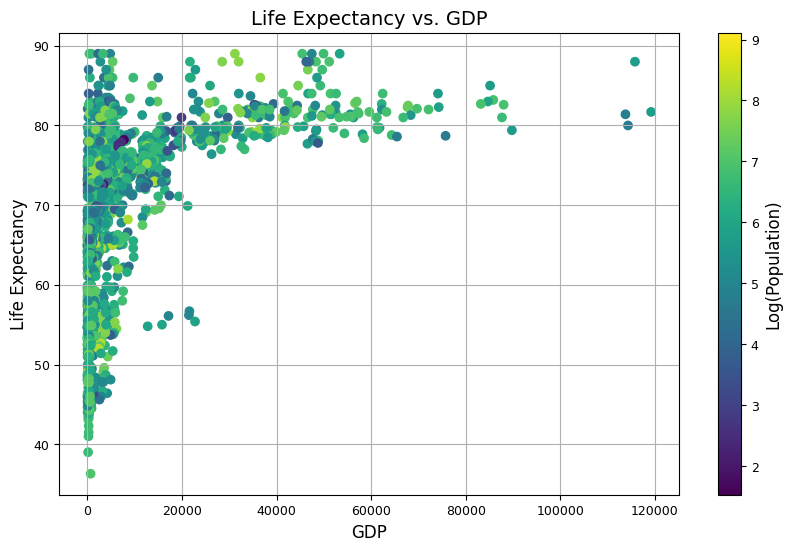

In [77]:
plt.figure(figsize=(10, 6))

# GDP stands for Gross Domestic Product.
# GDP can be related to life expectancy. Generally, countries with higher GDP tend to have 
# higher life expectancies. This relationship is often attributed to the fact that higher GDP
# enables countries to invest more in healthcare, education, infrastructure, and other factors 
# that can positively impact the overall well-being and health of the population.

plt.scatter(data['GDP'], data['Life expectancy '], c=np.log10(data['Population']), cmap='viridis')
plt.title('Life Expectancy vs. GDP')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.colorbar(label='Log(Population)')
plt.grid(True) 
plt.show()


# Features checking outlayers that needs bo be scaled 
## with population feature vs without population feature

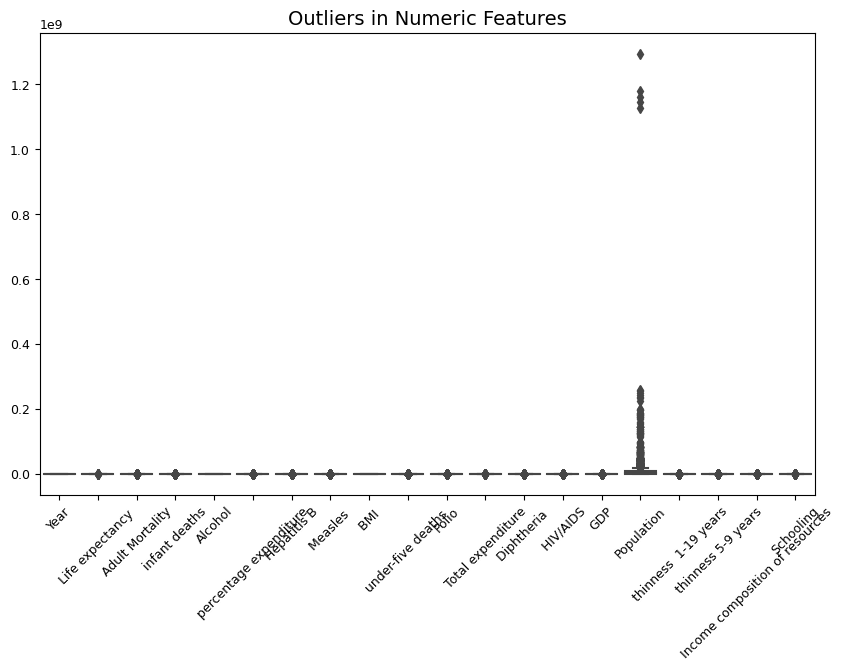

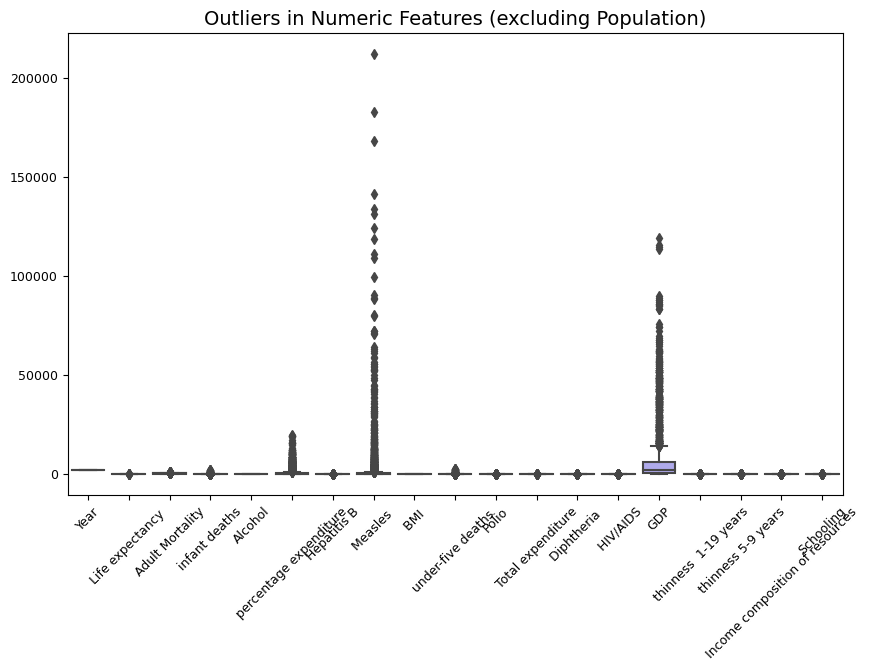

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# with population

# Plotting outliers using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data.select_dtypes(include=['float64', 'int64']))
plt.title('Outliers in Numeric Features')
plt.xticks(rotation=45)
plt.show()

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# without population

# Selecting numeric columns excluding 'Population'
numeric_columns = data.select_dtypes(include=['float64', 'int64']).drop('Population', axis=1)

# Plotting outliers using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=numeric_columns)
plt.title('Outliers in Numeric Features (excluding Population)')
plt.xticks(rotation=45)
plt.show()

# so as we see in the figures below  population, measles and GDP needs to be scaled.

# shuffle the indeces and stratify the dataset

In [80]:
# Perform random shuffle split
splitter = ShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in splitter.split(data):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

data = strat_train_set.drop("Life expectancy ", axis=1) # the training set without label
data_labels = strat_train_set["Life expectancy "].copy()  # the training set label

data_test = strat_test_set.drop("Life expectancy ", axis=1) # the test set without label
data_test_labels = strat_test_set["Life expectancy "].copy()  # the test set label

# Split the features to catagorical and numericals so we can fill the missing values 

In [81]:
data_cat = data[["Country","Status"]] #dataframe of the text or categorical columns
data_num = data.select_dtypes(include= [np.number]) #dataframe of the numerical columns

print(data.isnull().sum())    #to check the missing values.

Country                              0
Year                                 0
Status                               0
Adult Mortality                      8
infant deaths                        0
Alcohol                            158
percentage expenditure               0
Hepatitis B                        439
Measles                              0
 BMI                                27
under-five deaths                    0
Polio                               14
Total expenditure                  185
Diphtheria                          14
 HIV/AIDS                            0
GDP                                345
Population                         516
 thinness  1-19 years               27
 thinness 5-9 years                 27
Income composition of resources    131
Schooling                          129
dtype: int64


# Correlations:

In [94]:
data_num_df = pd.DataFrame(data_num )
corrMatrix = data_num_df.corr()
print(corrMatrix["GDP"].sort_values(ascending = False)) # checking the correlation between GDP and other features 


GDP                                1.000000
percentage expenditure             0.892607
Income composition of resources    0.451944
Schooling                          0.438536
Alcohol                            0.332036
 BMI                               0.300913
Polio                              0.202976
Diphtheria                         0.191009
Total expenditure                  0.124888
Year                               0.107353
Hepatitis B                        0.094182
Population                        -0.023733
Measles                           -0.068468
infant deaths                     -0.106548
under-five deaths                 -0.110117
 HIV/AIDS                         -0.133208
 thinness  1-19 years             -0.273236
 thinness 5-9 years               -0.279472
Adult Mortality                   -0.293588
Name: GDP, dtype: float64


# plot that shows the correlations

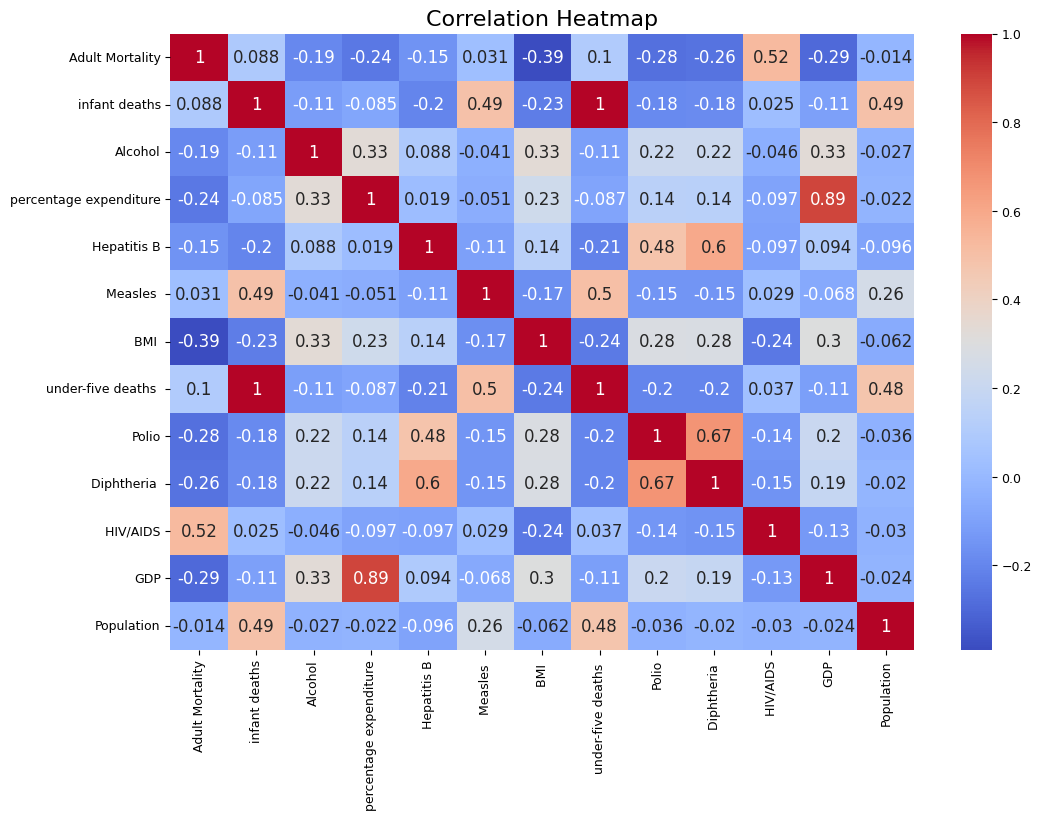

In [83]:
heatmap_columns = ['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
                   'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
                   'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population']

# Create a correlation matrix for the selected columns
correlation_matrix = data[heatmap_columns].corr()

# Create a heatmap using the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

# Checking which one is better "MinMaxScaler" or "StandardScaler" , i drew a plots for each, in Standard Scaling it is bounded to more values, thats why i used the StandardScaler in the pipleling

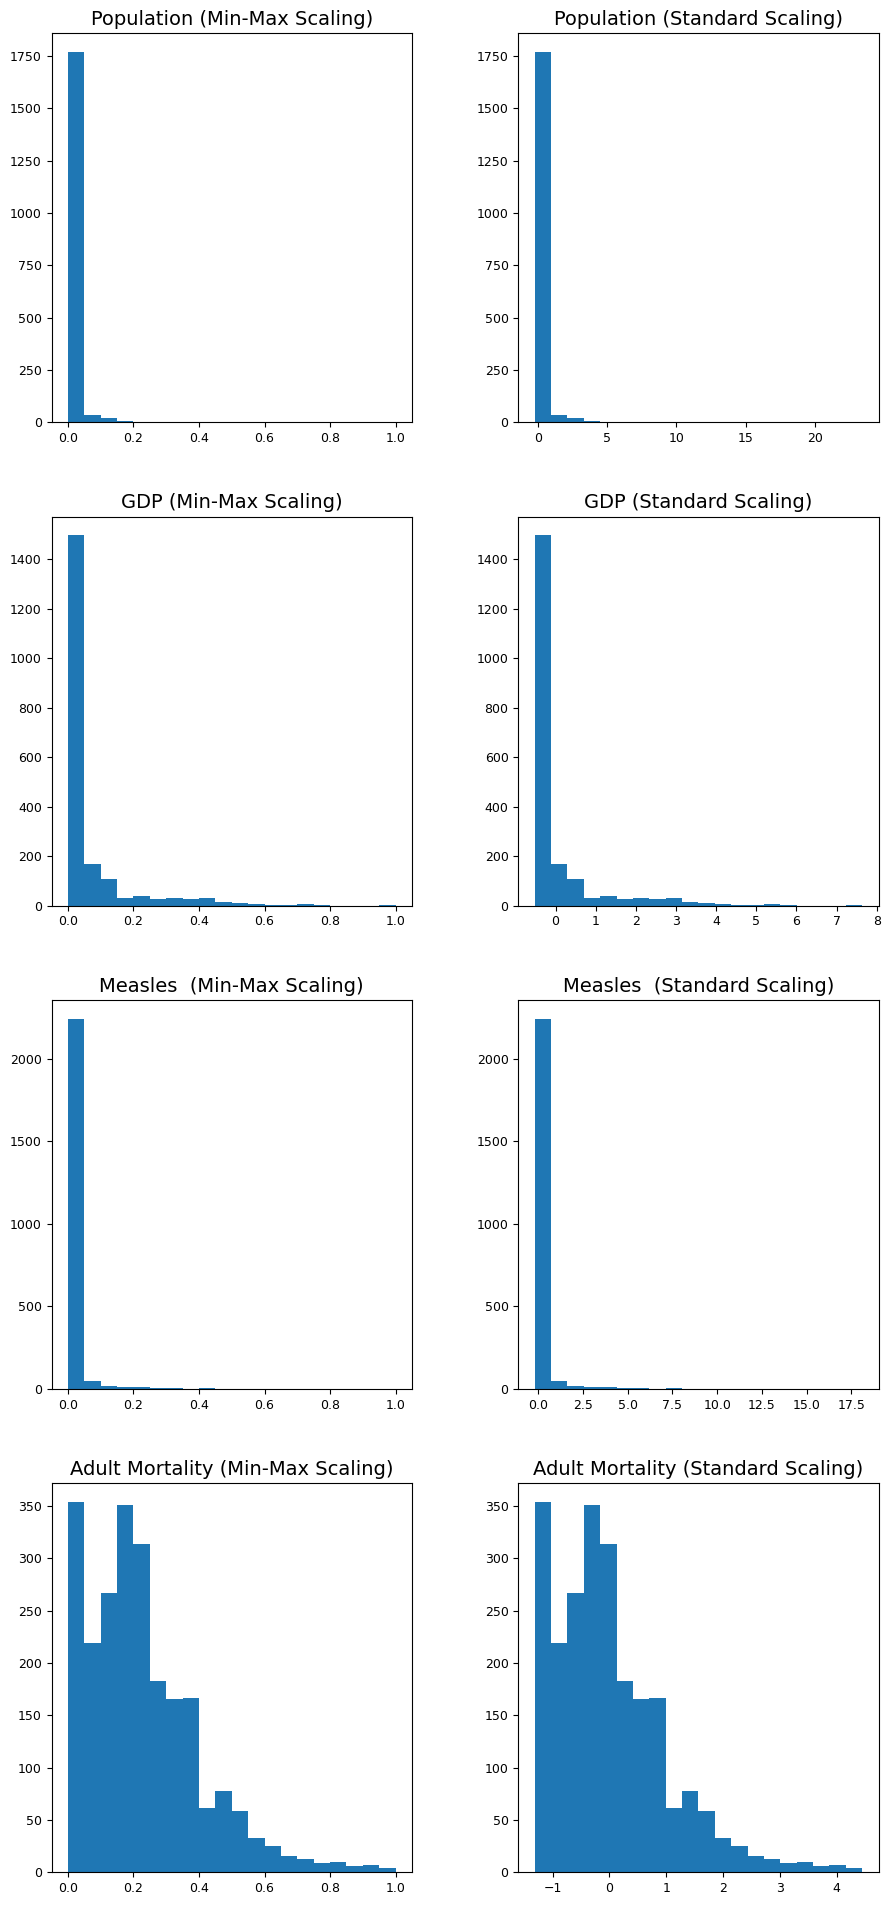

In [84]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

# Select the columns to be scaled
columns_to_scale = ["Population", "GDP", "Measles ","Adult Mortality"]

# Apply Min-Max scaling
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
data_minmax = min_max_scaler.fit_transform(data[columns_to_scale])

# Apply Standard scaling
standard_scaler = StandardScaler()
data_standard = standard_scaler.fit_transform(data[columns_to_scale])

# Create subplots for each column
fig, axes = plt.subplots(len(columns_to_scale), 2, figsize=(10, 20))
fig.tight_layout(pad=4)

# Plot Min-Max scaling
for i, column in enumerate(columns_to_scale):
    axes[i, 0].hist(data_minmax[:, i], bins=20)
    axes[i, 0].set_title(column + " (Min-Max Scaling)")

# Plot Standard scaling
for i, column in enumerate(columns_to_scale):
    axes[i, 1].hist(data_standard[:, i], bins=20)
    axes[i, 1].set_title(column + " (Standard Scaling)")

plt.show()


# Checking the missing values

In [85]:
data.columns

Index(['Country', 'Year', 'Status', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [86]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean',fill_value=None)
data['Adult Mortality']=imputer.fit_transform(data[['Adult Mortality']])
data['Alcohol']=imputer.fit_transform(data[['Alcohol']])
data['Hepatitis B']=imputer.fit_transform(data[['Hepatitis B']])
data[' BMI ']=imputer.fit_transform(data[[' BMI ']])
data['Polio']=imputer.fit_transform(data[['Polio']])
data['Total expenditure']=imputer.fit_transform(data[['Total expenditure']])
data['Diphtheria ']=imputer.fit_transform(data[['Diphtheria ']])
data['GDP']=imputer.fit_transform(data[['GDP']])
data['Population']=imputer.fit_transform(data[['Population']])
data[' thinness  1-19 years']=imputer.fit_transform(data[[' thinness  1-19 years']])
data[' thinness 5-9 years']=imputer.fit_transform(data[[' thinness 5-9 years']])
data['Income composition of resources']=imputer.fit_transform(data[['Income composition of resources']])
data['Schooling']=imputer.fit_transform(data[['Schooling']])

In [87]:
print(data.isnull().sum())    #to check the missing values.

Country                            0
Year                               0
Status                             0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


# Evaluate using different Regressors

### Linear Regressor

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

data3 = data.copy()
data3 = data.dropna()

LRdata = data3.copy()
x = LRdata.GDP.values.reshape(-1, 1)
y = LRdata['percentage expenditure'].values.reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

LR_reg = LinearRegression()
LR_reg.fit(x_train, y_train)

print(LR_reg.predict([[2500]]))

[[82.16968559]]


### Decision Tree Regressor

In [89]:
from sklearn.tree import DecisionTreeRegressor               # for our predict model

data1 = data.copy()
data1 = data.dropna()                                         # same is done 

DTdata = data1.copy()
x = DTdata.GDP.values.reshape(-1,1)
y = DTdata['percentage expenditure'].values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state= 42)
DT_reg = DecisionTreeRegressor()           # created model
DT_reg.fit(x_train,y_train)                # fitted model according to train values

print(DT_reg.predict([[1000]]))

[43.03043312]


### Random Forest Regressor 

In [90]:
from sklearn.ensemble import RandomForestRegressor           # for our predict model

data2 = data.copy()
data2 = data.dropna()                                         # same is done 

RFdata = data2.copy()
x = data2.GDP.values.reshape(-1,1)
y = data2['percentage expenditure'].values.reshape(-1,1)
RF_reg = RandomForestRegressor(n_estimators=100, random_state=42)          
RF_reg.fit(x,y)
print(RF_reg.predict([[1000]]))

C:\Users\ahmed\AppData\Local\Temp\ipykernel_9388\1453777738.py:10: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[75.4344219]


# Neural Network

In [91]:
from tensorflow import keras


##to split the code for 2 train set
x_valid = data[:700]
y_valid = data_labels[:700]
##to check how many colomns and rows for every train variables
print(x_train.shape, x_test.shape,x_valid.shape)
##to check how many row for test variables
print(y_train.shape, y_test.shape,y_valid.shape)


(1880, 1) (470, 1) (700, 21)
(1880, 1) (470, 1) (700,)


### First Model

In [92]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras

model1 = keras.models.Sequential()
data_numeric = data.drop(columns=['Country', 'Status'])  # Exclude non-numeric columns
data_labels = data['percentage expenditure']

# Convert the data type of data_numeric to float32
data_numeric = data_numeric.astype('float32')

# Perform label encoding on data_labels
label_encoder = LabelEncoder()
data_labels_encoded = label_encoder.fit_transform(data_labels)

# Determine the number of classes
num_classes = len(label_encoder.classes_)

# Split the data into training and validation sets
x_train, x_valid, y_train, y_valid = train_test_split(data_numeric, data_labels_encoded, test_size=0.2, random_state=42)

# Define your model architecture
model1 = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(data_numeric.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model1.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid))


Epoch 1/30
59/59 [==============================] - 2s 10ms/step - loss: 180045.5625 - accuracy: 0.0282 - val_loss: 31161.3633 - val_accuracy: 0.0000e+00
Epoch 2/30
59/59 [==============================] - 1s 10ms/step - loss: 3809.5149 - accuracy: 0.1447 - val_loss: 21.8800 - val_accuracy: 0.1894
Epoch 3/30
59/59 [==============================] - 0s 8ms/step - loss: 11.4825 - accuracy: 0.1989 - val_loss: 22.5761 - val_accuracy: 0.1894
Epoch 4/30
59/59 [==============================] - 1s 10ms/step - loss: 9.1868 - accuracy: 0.2027 - val_loss: 20.2500 - val_accuracy: 0.1894
Epoch 5/30
59/59 [==============================] - 1s 10ms/step - loss: 8.3273 - accuracy: 0.2037 - val_loss: 20.1989 - val_accuracy: 0.1915
Epoch 6/30
59/59 [==============================] - 1s 10ms/step - loss: 8.1015 - accuracy: 0.2064 - val_loss: 19.0894 - val_accuracy: 0.1936
Epoch 7/30
59/59 [==============================] - 1s 10ms/step - loss: 7.7293 - accuracy: 0.2064 - val_loss: 18.7989 - val_accuracy

### Second Model 

In [93]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras

model2 = keras.models.Sequential()
data_numeric = data.drop(columns=['Country', 'Status'])  # Exclude non-numeric columns
data_labels = data['percentage expenditure']

# Convert the data type of data_numeric to float32
data_numeric = data_numeric.astype('float32')

# Perform label encoding on data_labels
label_encoder = LabelEncoder()
data_labels_encoded = label_encoder.fit_transform(data_labels)

# Determine the number of classes
num_classes = len(label_encoder.classes_)

# Split the data into training and validation sets
x_train, x_valid, y_train, y_valid = train_test_split(data_numeric, data_labels_encoded, test_size=0.2, random_state=42)

# Define your model architecture
model2 = keras.Sequential([
    keras.layers.Dense(64, activation='selu', input_shape=(data_numeric.shape[1],)),
    keras.layers.Dense(32, activation='selu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid))


Epoch 1/30
59/59 [==============================] - 1s 10ms/step - loss: 6.1630 - accuracy: 0.2133 - val_loss: 12.8406 - val_accuracy: 0.1957
Epoch 2/30
59/59 [==============================] - 0s 6ms/step - loss: 6.1442 - accuracy: 0.2117 - val_loss: 12.8025 - val_accuracy: 0.1957
Epoch 3/30
59/59 [==============================] - 0s 8ms/step - loss: 6.1352 - accuracy: 0.2154 - val_loss: 12.8977 - val_accuracy: 0.1957
Epoch 4/30
59/59 [==============================] - 1s 10ms/step - loss: 6.1276 - accuracy: 0.2160 - val_loss: 12.8534 - val_accuracy: 0.1957
Epoch 5/30
59/59 [==============================] - 1s 10ms/step - loss: 6.1307 - accuracy: 0.2128 - val_loss: 12.9196 - val_accuracy: 0.1957
Epoch 6/30
59/59 [==============================] - 1s 9ms/step - loss: 6.1298 - accuracy: 0.2128 - val_loss: 12.9410 - val_accuracy: 0.1957
Epoch 7/30
59/59 [==============================] - 1s 9ms/step - loss: 6.1795 - accuracy: 0.2133 - val_loss: 13.0612 - val_accuracy: 0.1957
Epoch 8/30